## The SIR model with two age groups

The partitioning of the population can be refined to include other attributes relevant to the disease. One of the most important of these is the age. Let us assume we partition the population into two age groups, children and adults, and label them by the index $i=1,2$. Children can catch the infection from other children or from adults; likewise, adults can catch the infection from other adults or from children. Calling their respective rates of infection $\lambda_1(t)$ and $\lambda_2(t)$ we get
\begin{align}
\lambda_1(t) = \beta(C_{11}\frac{I_1}{N_1} + C_{12}\frac{I_2}{N_2})S_1\\
\lambda_2(t) = \beta(C_{21}\frac{I_1}{N_1} + C_{22}\frac{I_2}{N_2})S_2
\end{align}
where $C_{ij}$ are contact matrices, quantifying how much each age group interacts with the other. The ordinary differential equations of this age-structured SIR model are 

\begin{align}
\dot S_i &= -\lambda_i(t)S_i \\
\dot I_i &= \lambda(t)_iI_i - \gamma I_i \\
\dot R_i &= \gamma I_i 
\end{align}

Again, for each $i$ the sum $N_i = S_i + I_i + R_i$ remains constant. What do we expect qualitatively ? The group that has a greater rate will catch the disease faster and catch more of it. This depends on how the entries of the contact matrix are distributed. 

This example integrates the above equations to **epidemic curve** for both the children and the adults. We see that they have unequal rates of infection. 

In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [2]:
import numpy as np
import pyross
import matplotlib.pyplot as plt

In [3]:
# age structure of the population

N =  1000000         # total population

M  = 2               # age groups
Ni = np.zeros((M))   # population in each group
fi = np.zeros((M))   # fraction of population in age age group

fi = np.array((0.25, 0.75)) 
for i in range(M):
    Ni[i] = fi[i]*N
    
# epidemic parameters
alpha = 0.              # symptomatic fraction
beta  = 0.0131          # contact rate parameter
gamma = 1./7            # recovery rate 
fsa=1; Tf=200; 

# contact structure of the population
# contact matrix satisifies N_i * C_ij = N_j * C_ji
C0 = np.array(([18., 9.], [3., 12.]))
C = np.zeros((2*Tf, M*M))

for i in range(2*Tf):
    C[i, :] = C0.reshape(M*M)
    

# matrix for linearised dynamics
L = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        L[i,j]=C[i,j]*Ni[i]/Ni[j]

L = (alpha*beta/gamma)*L

r0 = np.max(np.linalg.eigvals(L))
print("The basic reproductive ratio for these parameters is", r0)

The basic reproductive ratio for these parameters is 0.0


In [4]:
# initial conditions    
Ia_0 = np.array((1,1))
Is_0 = np.array((1,1))
R_0  = np.array((0,0))
S_0  = Ni - (Ia_0 + Is_0 + R_0)
model = pyross.models.SIR(S_0, Ia_0, Is_0, alpha, beta, gamma, fsa, M, Ni, Tf)

# start simulation
Nf=2000; filename='this.mat'
model.simulate(C, Nf, filename)

In [5]:
#plot the data
from scipy.io import loadmat
data=loadmat(filename)
IK = data['X'][:,2*M].flatten()
IA = data['X'][:,2*M+1].flatten()
t = data['t'][0] 

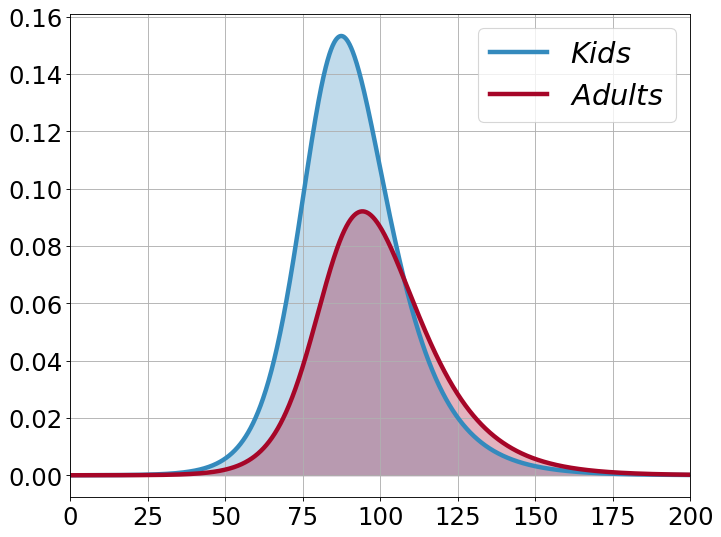

In [6]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, IK/Ni[0], color="#348ABD", alpha=0.3)
plt.plot(t, IK/Ni[0], '-', color="#348ABD", label='$Kids$', lw=4)

plt.fill_between(t, 0, IA/Ni[1], color='#A60628', alpha=0.3)
plt.plot(t, IA/Ni[1], '-', color='#A60628', label='$Adults$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)